In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
data["sex"] = data["sex"].astype("category")
data["smoker"] = data["smoker"].astype("category")
data["region"] = data["region"].astype("category")

In [8]:
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
smoke_data = data.groupby("smoker").mean().round(2)

In [11]:
smoke_data

,age,bmi,children,charges
smoker,,,,
no,39.39,30.65,1.09,8434.27
yes,38.51,30.71,1.11,32050.23


In [12]:
import seaborn as sns

In [13]:
sns.set_style("whitegrid")

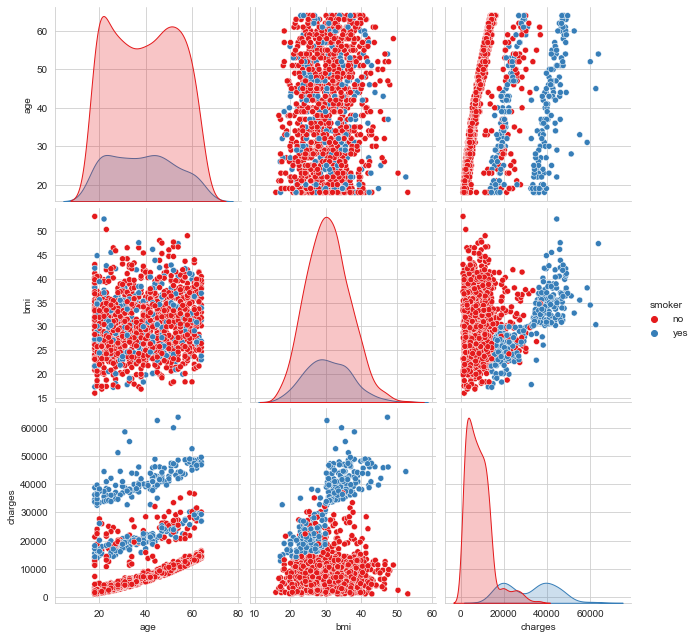

In [14]:
sns.pairplot(data[["age","bmi","charges","smoker"]],
             hue = "smoker" ,
             height = 3,
             palette = "Set1")

<AxesSubplot:>

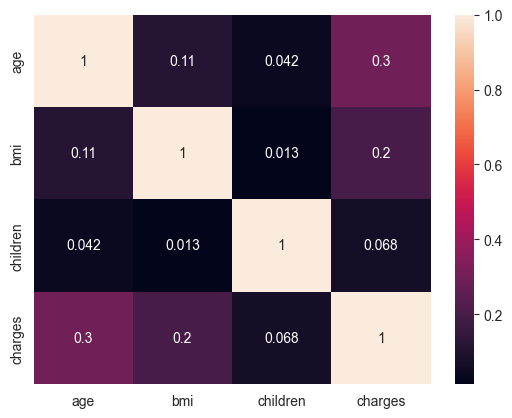

In [15]:
sns.heatmap(data.corr() , annot = True)

In [16]:
data.dtypes # We need to set categoric columns for scikit-learn.

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [17]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
data = pd.get_dummies(data) # We changed categoric columns to get dummies.(Binary format.) # We can do it also with scikit-learn

In [19]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [20]:
data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [21]:
y = data["charges"]

In [22]:
X = data.drop("charges" , axis = 1)

In [23]:
from sklearn.model_selection import train_test_split # We import train_test_split method from sklearn.model_selection. Thats very important part.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8 , random_state=1 )

In [25]:
from sklearn.linear_model import LinearRegression # We get LinearRegression model for our dataset. We will use basic linear regression for this dataset.

In [26]:
lr = LinearRegression() # We get a sample from LinearRegression class. We created our model.

In [27]:
lr.fit(X_train,y_train) # We train our model with fit method.

LinearRegression()

In [28]:
lr.score(X_test,y_test).round(3) # We got R**2 performance.

0.762

In [29]:
lr.score(X_train,y_train).round(3) # Almost same with test values. If it was high, it could means there is a overfitting problem.
                                   # If there was an overfitting problem, we could use ridge or lasso models.

0.748

In [30]:
y_pred = lr.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mean_squared_error(y_test,y_pred)**0.5

5956.454717976427

In [33]:
data_new = X_train[:1]

In [34]:
data_new

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
216,53,26.6,0,1,0,1,0,0,1,0,0


In [35]:
lr.predict(data_new)

array([10508.41885042])

In [36]:
y_train[:1]

216    10355.641
Name: charges, dtype: float64